In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

Using TensorFlow backend.


In [2]:
num_classes = 5
img_rows,img_cols = 48,48
batch_size = 32


In [3]:
train_data_dir = 'fer2013\\train'
validation_data_dir = 'fer2013\\validation'


In [4]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=30,
shear_range=0.3,
zoom_range=0.3,
width_shift_range=0.4,
height_shift_range=0.4,
horizontal_flip=True,
fill_mode='nearest')

In [5]:
validation_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
train_generator = train_datagen.flow_from_directory(
train_data_dir,
color_mode='grayscale',
target_size=(img_rows,img_cols),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)


Found 24256 images belonging to 5 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
validation_data_dir,
color_mode='grayscale',
target_size=(img_rows,img_cols),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)

Found 3006 images belonging to 5 classes.


In [8]:
model = Sequential()

In [9]:
# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [10]:
# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [11]:
# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [12]:
# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [13]:
# Block-5

model.add(Flatten()) 
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [14]:
# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [15]:
# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [16]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)       

In [17]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [18]:
checkpoint = ModelCheckpoint('classification_new.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

In [19]:
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

In [20]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

In [21]:
callbacks = [earlystop,checkpoint,reduce_lr]

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [23]:
nb_train_samples = 24176
nb_validation_samples = 3006
epochs=25

In [24]:

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)


Epoch 1/25
755/755 [==============================] - 1861s 2s/step - loss: 1.8468 - accuracy: 0.2370 - val_loss: 1.6147 - val_accuracy: 0.2967

Epoch 00001: val_loss improved from inf to 1.61468, saving model to classification_new.h5
Epoch 2/25
755/755 [==============================] - 1385s 2s/step - loss: 1.5758 - accuracy: 0.2826 - val_loss: 1.6368 - val_accuracy: 0.3040

Epoch 00002: val_loss did not improve from 1.61468
Epoch 3/25
755/755 [==============================] - 1006s 1s/step - loss: 1.5479 - accuracy: 0.3030 - val_loss: 1.4390 - val_accuracy: 0.3241

Epoch 00003: val_loss improved from 1.61468 to 1.43905, saving model to classification_new.h5
Epoch 4/25
755/755 [==============================] - 1139s 2s/step - loss: 1.5248 - accuracy: 0.3180 - val_loss: 1.3989 - val_accuracy: 0.3487

Epoch 00004: val_loss improved from 1.43905 to 1.39889, saving model to classification_new.h5
Epoch 5/25
755/755 [==============================] - 1355s 2s/step - loss: 1.4621 - accura

In [44]:
print(history.history['val_accuracy'])

[0.2967069745063782, 0.3039677143096924, 0.32414257526397705, 0.34868863224983215, 0.4710827171802521, 0.4979825019836426, 0.490585058927536, 0.5410221815109253, 0.5457296371459961, 0.5447208881378174, 0.5689307451248169, 0.5685945153236389, 0.5706119537353516]


In [33]:
import matplotlib.pyplot as plt

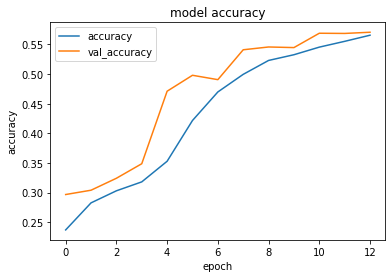

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

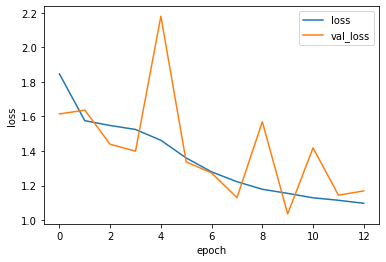

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper right')
plt.show()

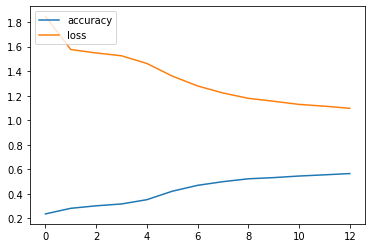

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy','loss'], loc='upper left')
plt.show()